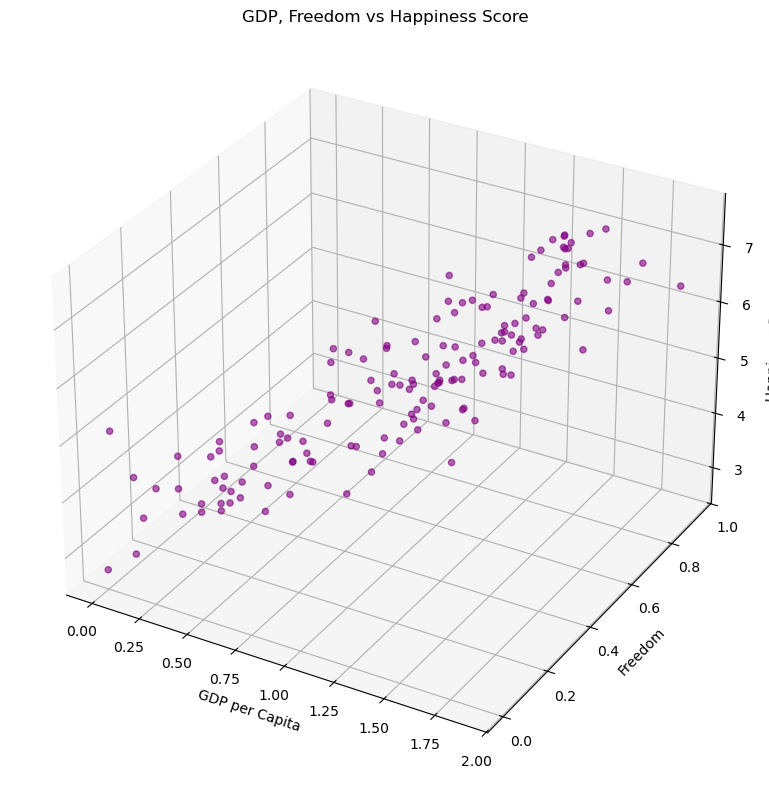

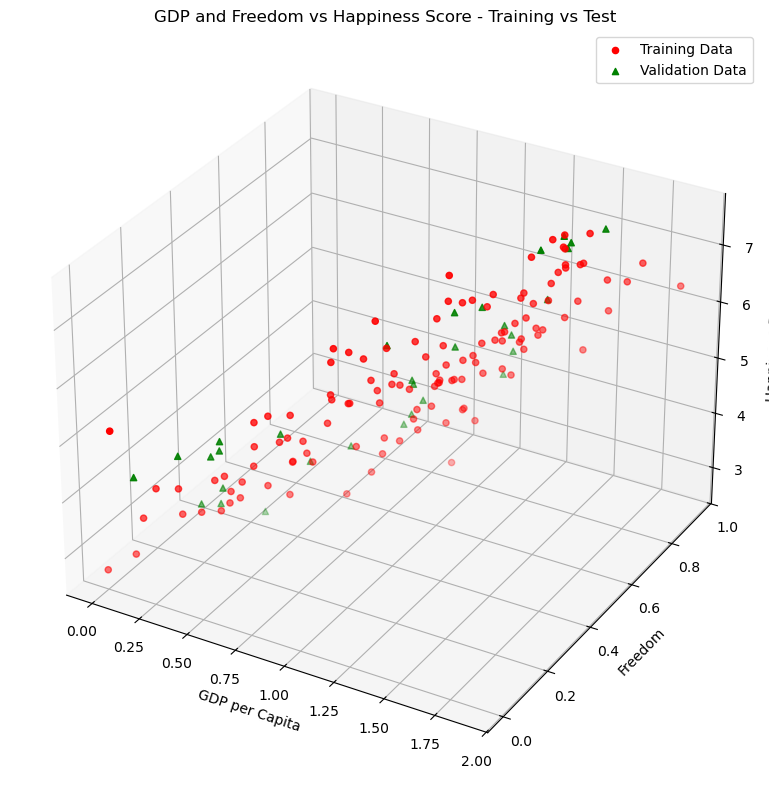

Model: f(x1, x2) = 3.2008 + -68611.7342 * GDP + 137227.7692 * Freedom


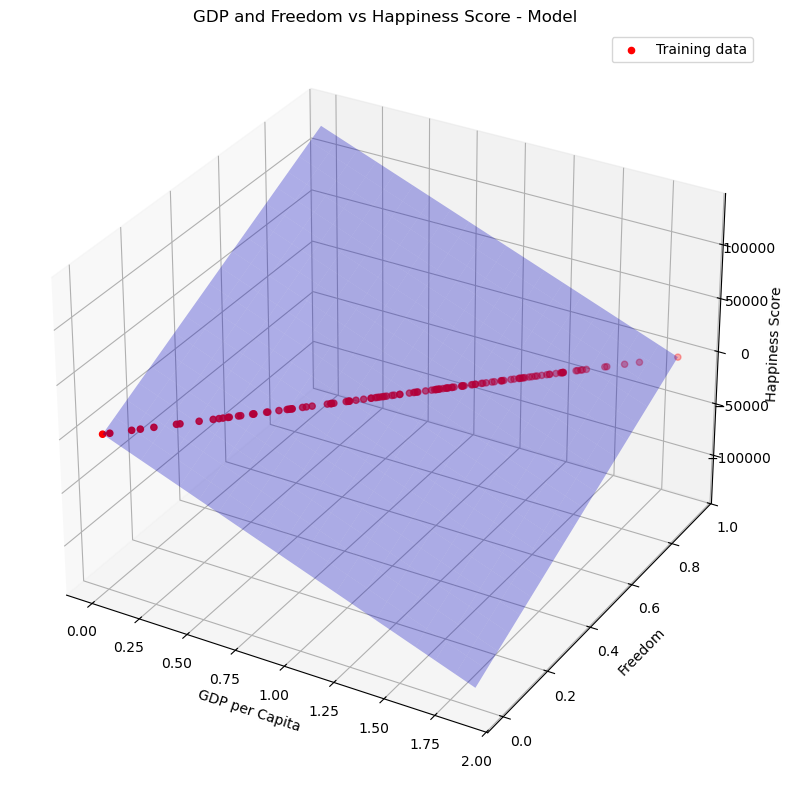

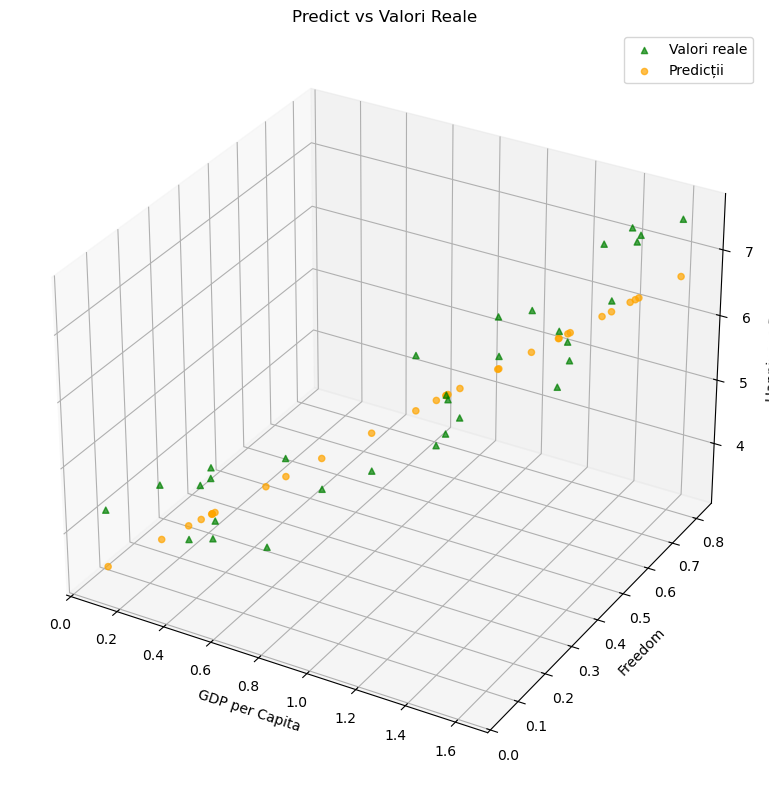

MSE: 0.414210


In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

def load_data(file_name, input_names, output_name):
    data = []
    header = []

    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
            else:
                data.append(row)
            line_count += 1

    input_indices = [header.index(var) for var in input_names]
    output_idx = header.index(output_name)

    all_inputs = []
    for i in range(len(data)):
        row_inputs = []
        has_missing = False
        for idx in input_indices:
            if data[i][idx] == '':
                has_missing = True
                row_inputs.append(None)
            else:
                row_inputs.append(float(data[i][idx]))
        
        output_val = None if data[i][output_idx] == '' else float(data[i][output_idx])
        
        all_inputs.append((row_inputs, output_val, has_missing or output_val is None))

    means = []
    for j in range(len(input_indices)):
        valid_values = [all_inputs[i][0][j] for i in range(len(all_inputs)) if all_inputs[i][0][j] is not None]
        means.append(sum(valid_values) / len(valid_values))
    
    valid_outputs = [all_inputs[i][1] for i in range(len(all_inputs)) if all_inputs[i][1] is not None]
    output_mean = sum(valid_outputs) / len(valid_outputs)
    
    filtered_inputs = []
    filtered_outputs = []
    
    for i in range(len(all_inputs)):
        input_values = []
        for j in range(len(input_indices)):
            if all_inputs[i][0][j] is None:
                input_values.append(means[j])
            else:
                input_values.append(all_inputs[i][0][j])
        
        filtered_inputs.append(input_values)
        
        if all_inputs[i][1] is None:
            filtered_outputs.append(output_mean)
        else:
            filtered_outputs.append(all_inputs[i][1])
    
    return filtered_inputs, filtered_outputs

file_path = 'data/v2_world-happiness-report-2017.csv'
inputs_gdp_freedom, outputs_happiness = load_data(file_path, ['Economy..GDP.per.Capita.', 'Freedom'],'Happiness.Score')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([row[0] for row in inputs_gdp_freedom], [row[1] for row in inputs_gdp_freedom], outputs_happiness, c='purple', marker='o', alpha=0.6)
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
plt.title('GDP, Freedom vs Happiness Score')
plt.tight_layout()
plt.show()

np.random.seed(5)
indexes = [i for i in range(len(inputs_gdp_freedom))]

train_sample = np.random.choice(indexes, int(0.8 * len(inputs_gdp_freedom)), replace=False)
validation_sample = [i for i in indexes if i not in train_sample]
train_inputs = [inputs_gdp_freedom[i] for i in train_sample]
train_outputs = [outputs_happiness[i] for i in train_sample]
validation_inputs = [inputs_gdp_freedom[i] for i in validation_sample]
validation_outputs = [outputs_happiness[i] for i in validation_sample]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([inp[0] for inp in train_inputs], [inp[1] for inp in train_inputs], train_outputs, c='red', marker='o', label='Training Data')
ax.scatter([inp[0] for inp in validation_inputs], [inp[1] for inp in validation_inputs], validation_outputs,c='green', marker='^', label='Validation Data')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
ax.set_title('GDP and Freedom vs Happiness Score - Training vs Test')
ax.legend()
plt.tight_layout()
plt.show()

regressor = linear_model.LinearRegression()
regressor.fit(train_inputs, train_outputs)
w0 = regressor.intercept_
w = regressor.coef_

print(f"Model: f(x1, x2) = {w0:.4f} + {w[0]:.4f} * GDP + {w[1]:.4f} * Freedom")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([row[0] for row in train_inputs], [row[1] for row in train_inputs], train_outputs, c='r', marker='o', label='Training data')
x1_min, x1_max = min([row[0] for row in train_inputs]), max([row[0] for row in train_inputs])
x2_min, x2_max = min([row[1] for row in train_inputs]), max([row[1] for row in train_inputs])
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 20), np.linspace(x2_min, x2_max, 20))
zz = w0 + w[0] * xx1 + w[1] * xx2
surf = ax.plot_surface(xx1, xx2, zz, alpha=0.3, color='blue')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
ax.set_title('GDP and Freedom vs Happiness Score - Model')
ax.legend()
plt.tight_layout()
plt.show()

testPredict = regressor.predict(validation_inputs)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x1 = [row[0] for row in validation_inputs]
x2 = [row[1] for row in validation_inputs]
ax.scatter(x1, x2, validation_outputs, c='green', marker='^', alpha=0.7, label='Valori reale')
ax.scatter(x1, x2, testPredict, c='orange', marker='o', alpha=0.7, label='Predicții')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
ax.set_title('Predict vs Valori Reale')
ax.legend()
plt.tight_layout()
plt.show()

error = mean_squared_error(validation_outputs, testPredict)
print(f"MSE: {error:.6f}")